In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# import data
data = pd.read_csv('spotify_song_features.csv', encoding='latin-1')
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,title,artist
0,0.406,0.623,2,-6.992,0,0.0516,0.00199,0.000346,0.4320,0.163,150.389,audio_features,2RwxKOqGh9IEiBpwVLgkQT,spotify:track:2RwxKOqGh9IEiBpwVLgkQT,https://api.spotify.com/v1/tracks/2RwxKOqGh9IE...,https://api.spotify.com/v1/audio-analysis/2Rwx...,155187,4,Give Up On You,hayve
1,0.413,0.731,2,-4.912,0,0.0526,0.08720,0.000226,0.0941,0.134,139.785,audio_features,22PQ3q11bQCUoFdiHnXbRf,spotify:track:22PQ3q11bQCUoFdiHnXbRf,https://api.spotify.com/v1/tracks/22PQ3q11bQCU...,https://api.spotify.com/v1/audio-analysis/22PQ...,292286,4,Blood and Moonlight,Celestial Void
2,0.462,0.613,4,-6.335,1,0.0315,0.07780,0.001030,0.1010,0.227,139.946,audio_features,6EjawNS588Rrm39sybcjy2,spotify:track:6EjawNS588Rrm39sybcjy2,https://api.spotify.com/v1/tracks/6EjawNS588Rr...,https://api.spotify.com/v1/audio-analysis/6Eja...,195429,4,Red Thread,shXdow.
3,0.605,0.783,3,-4.271,1,0.0324,0.29900,0.000175,0.1330,0.105,124.015,audio_features,02shCNmb6IvgB5jLqKjtkK,spotify:track:02shCNmb6IvgB5jLqKjtkK,https://api.spotify.com/v1/tracks/02shCNmb6Ivg...,https://api.spotify.com/v1/audio-analysis/02sh...,208562,4,Nevada,Vicetone
4,0.498,0.494,0,-12.420,1,0.0343,0.01180,0.001080,0.1660,0.120,134.983,audio_features,1YXUD5D1ZRSaKZRZME4UB5,spotify:track:1YXUD5D1ZRSaKZRZME4UB5,https://api.spotify.com/v1/tracks/1YXUD5D1ZRSa...,https://api.spotify.com/v1/audio-analysis/1YXU...,209938,4,You'll Be OK,Gareth Emery


In [19]:
# preprocessing, remove type, id, uri, track_href, analysis_url, title, artist
parsed_data = data.drop(['type', 'id', 'uri', 'track_href', 'analysis_url', 'title', 'artist'], axis=1)
parsed_data.head()

# check for null values
# parsed_data.isnull().sum()

print(parsed_data)
# normalize data
x = parsed_data.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
parsed_data = pd.DataFrame(x_scaled)
parsed_data.head()
# collect song titles
titles = data['title']
artists = data['artist']
print(parsed_data)


     danceability  energy  key  loudness  mode  speechiness  acousticness  \
0           0.406   0.623    2    -6.992     0       0.0516       0.00199   
1           0.413   0.731    2    -4.912     0       0.0526       0.08720   
2           0.462   0.613    4    -6.335     1       0.0315       0.07780   
3           0.605   0.783    3    -4.271     1       0.0324       0.29900   
4           0.498   0.494    0   -12.420     1       0.0343       0.01180   
..            ...     ...  ...       ...   ...          ...           ...   
739         0.576   0.859    8    -3.360     1       0.0687       0.05970   
740         0.504   0.927   11    -2.936     0       0.0479       0.01020   
741         0.644   0.915    9    -3.019     1       0.0587       0.19600   
742         0.470   0.706    0    -4.902     0       0.0322       0.03400   
743         0.560   0.742    9    -6.122     1       0.0666       0.01500   

     instrumentalness  liveness  valence    tempo  duration_ms  time_signat

c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

283.048934006084
247.47595250781436
220.32390493677573
202.3686647830106


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

189.37693075905267
176.75456614736524
169.2858333422861
162.05078809911345


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


157.34104847673794
152.01627537364007
148.30926956527156


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


144.77879592167145
140.85774799662184
138.60973937047459


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


134.3868364068708
130.63042364502255
128.9242845947684


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


127.44390322495902
124.16207982614246
121.91381603882434


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


120.63333942714898
118.20332166633374
114.94591009066552


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


114.09919970869177
112.8664449656575
110.76975630713738


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


108.88790195796729
106.4129350154858
106.57971561574105


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


104.3652958491893
103.3553747450079
101.05084751967073


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


101.0354567364663
99.53939199710892
98.92030837730033
97.11718199925272
96.28508453523547


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

94.66199218489626
93.62206268329058


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


92.43458104455817
91.95907820128976


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


90.76257044858001
89.74465786294921


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


89.3645277962658
88.93193387205604


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


87.97334952386416
86.05376422021769


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


86.35117132552071


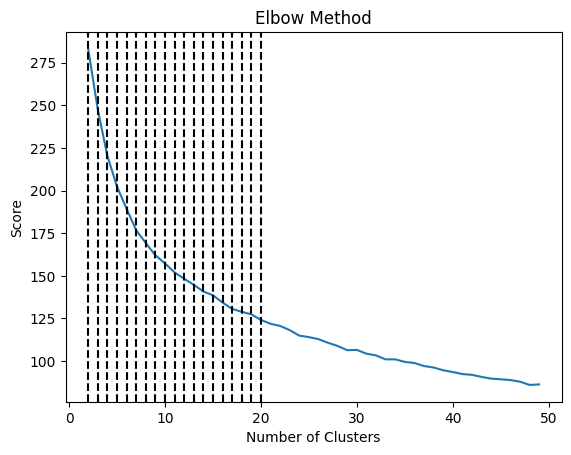

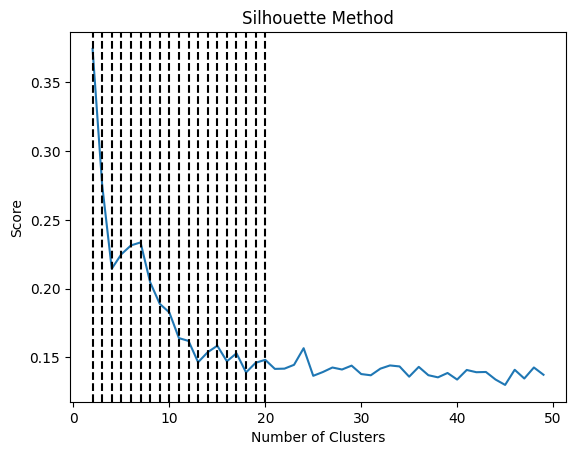

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define x and y
x = parsed_data.values
y = data['title'].values[:len(x)]  # Use only the first len(x) elements of y

# k-means
scores = []
sScores = []
rangeMin = 2
rangeMax = 50
for i in range(rangeMin, rangeMax):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    print(kmeans.inertia_)
    scores.append(kmeans.inertia_)
    score = silhouette_score(x, kmeans.labels_)
    sScores.append(score)
    
# plot elbow method
plt.plot(range(rangeMin, rangeMax), scores)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
# show vertical lines from 1-20 clusters
for i in range(rangeMin, 21):
    plt.axvline(x=i, color='k', linestyle='--')
plt.ylabel('Score')
plt.show()

# plot the silhouette score
plt.plot(range(rangeMin, rangeMax), sScores)
plt.title('Silhouette Method')
for i in range(rangeMin, 21):
    plt.axvline(x=i, color='k', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()    

Local Opt at 2, 7

inertia
176.68091309667076
-176.68091309667076


c:\Users\Michael\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


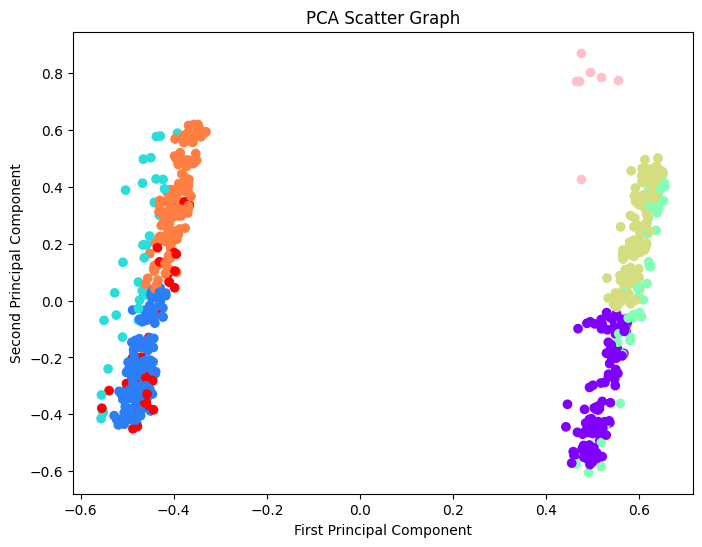

In [41]:
# k-means with lowest inertia index
n_clusters = 7
    
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(x)
# print(kmeans.cluster_centers_)
# print(kmeans.labels_)
print('inertia')
print(kmeans.inertia_)
# print(kmeans.n_iter_)
print(kmeans.score(x))

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

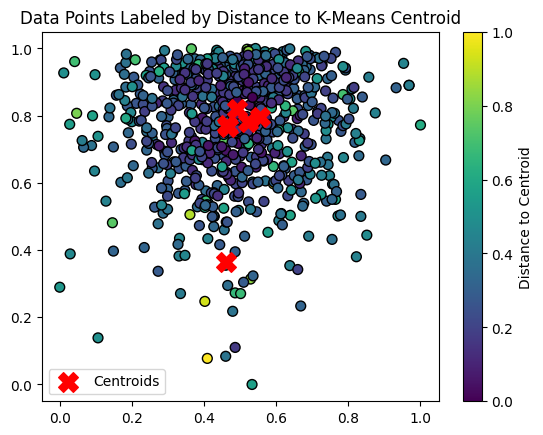

In [27]:
X=x
# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculate distances from each point to its cluster centroid
distances = [np.linalg.norm(X[i] - centroids[labels[i]]) for i in range(len(X))]

# Plot the data points with labels based on distances to centroids
plt.scatter(X[:, 0], X[:, 1], c=distances, cmap='viridis', edgecolors='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
# label points with song titles
for i, txt in enumerate(titles):
    try:
        # replace '$$' in string titles with 'SS' if it is there
        txt = txt.replace('$$', 'SS')
        # plt.annotate(txt, (X[i,0], X[i,1]))
    except Exception as E:
        print(E)
        continue

plt.colorbar(label='Distance to Centroid')
plt.title('Data Points Labeled by Distance to K-Means Centroid')
plt.legend()
plt.show()

In [42]:
# merge data with labels
output_data = data[['title', 'artist','id','uri']]
output_data['labels'] = kmeans.labels_
output_data['distances'] = distances

# sort by labels and then by inverse distances
output_data = output_data.sort_values(['labels', 'distances'], ascending=[True, True])
print(output_data)

# save to csv
output_data.to_csv('output_data.csv', index=False)

                                        title         artist  \
17                Gltchlfe (Kdrew Radio Edit)  Taryn Manning   
176                                 Fade Away          Nasko   
668                              Life Goes On          Akade   
423                             Back Together  William Black   
673                                Safe House       Dr Phunk   
..                                        ...            ...   
7                  Nevada - Vicetone Lofi Mix       Vicetone   
509                                    keygen      Nitro Fun   
527  Nightmare On Rezz Street (Halloween Mix)           Rezz   
207                                     Phony         Noflik   
216                The Purge | Trap Type Beat   Havock Beatz   

                         id                                   uri  labels  \
17   5IF16c5m61ofhwU0uAqCOF  spotify:track:5IF16c5m61ofhwU0uAqCOF       0   
176  7kQFub7oUNikwLXPldA69U  spotify:track:7kQFub7oUNikwLXPldA69U       0   


C:\Users\Michael\AppData\Local\Temp\ipykernel_24632\1797984757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_data['labels'] = kmeans.labels_
C:\Users\Michael\AppData\Local\Temp\ipykernel_24632\1797984757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_data['distances'] = distances


In [28]:
# plot PCA scatter graph with song title labels
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='rainbow')
# plot centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='pink')
for i, txt in enumerate(titles):
    try:
        # replace '$$' in string titles with 'SS' if it is there
        txt = txt.replace('$$', 'SS')
        # plt.annotate(txt, (x_pca[i,0], x_pca[i,1]))
    except Exception as E:
        print(E)
        continue
    
plt.title('PCA Scatter Graph')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

                                                 title          artist  \
46                                           Limitless   Martin Garrix   
131                                             I Know   3rd Prototype   
590                                             Switch      Don Diablo   
382                                          Inception        Teminite   
642                                               BOOM          Tiësto   
..                                                 ...             ...   
730  The Mechanisms Of Nature (Dream Village Anthem...       Energyzed   
350                            G Shit (Badklaat Remix)        Excision   
191                              One Point Perspective  Arctic Monkeys   
557                       Superhuman (feat. Eric Leva)         SLANDER   
99                               a mosh pit love story     Savage Ga$p   

                         id                                   uri  labels  \
46   44ib3nlda2rBy0qmMUelnd  spoti

C:\Users\Michael\AppData\Local\Temp\ipykernel_24632\3284411109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_data['labels'] = kmeans.labels_
C:\Users\Michael\AppData\Local\Temp\ipykernel_24632\3284411109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_data['distances'] = distances


                           title         artist                      id  \
17   Gltchlfe (Kdrew Radio Edit)  Taryn Manning  5IF16c5m61ofhwU0uAqCOF   
176                    Fade Away          Nasko  7kQFub7oUNikwLXPldA69U   
668                 Life Goes On          Akade  1GhPC6vSuridTr0j2lHfRz   
423                Back Together  William Black  7MD5qMLhP1Xll1yACGFR2h   
673                   Safe House       Dr Phunk  3u7417TclSj7K4zSqQjWmJ   
..                           ...            ...                     ...   
98                 Face My Fears   Wind Walkers  2GFzQSigl78S1slVJ25rZD   
333       Down with the Sickness      Disturbed  40rvBMQizxkIqnjPdEWY1v   
65                Run - Acoustic  Dylan Matthew  1ub9kv2OJiDMsX94lVnmeP   
361        Ocean Eyes (Acoustic)        SVRCINA  1mKAKzJuIZWz3M0nbVDfmD   
200      Epidemic (Introduction)   Ed Money 2.0  3nRAg3yFDijl0B88b9P5q4   

                                      uri  labels  distances  
17   spotify:track:5IF16c5m61ofhwU0u

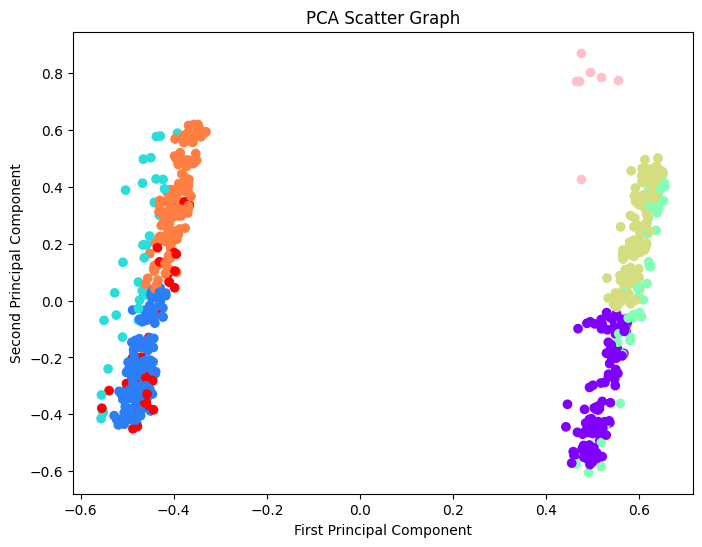